In [1]:
import os
import math
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
import math
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_sample_weight

c:\Users\Me\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
hinge_sgd_clf = SGDClassifier(loss="hinge", max_iter=10000, tol=1e-3, random_state=42, learning_rate="adaptive",eta0=0.1)
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
# 
svm_clfw = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

In [2]:
X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename="l1calo_topocluster_test_Zee.root", reject_data_filename="l1calo_hist_ZB_EN.root", data_subdir="topocluster_test_Z_EN_test", format_mode="topocluster_ET_boundaries",distance_boundaries=[0.05,0.1,0.2,0.3,0.4])

preprepared data in ..\data\topocluster_test_Z_EN_test is missing, preparing and saving here
attempting to generate topo training data


100%|██████████| 21701/21701 [00:10<00:00, 2067.75it/s]


In [15]:

distance_boundaries_array = [[0.1,0.2,0.3,0.4],
                             [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],
                             [0.05,0.1,0.15,0.4],
                             [0.0125,0.025,0.05,0.1,0.2,0.4]]
for distance_boundaries in distance_boundaries_array:
    extension = ''.join(str(decimal).replace('.','').replace('.','') for decimal in distance_boundaries)
    X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename="l1calo_topocluster_test_Zee.root", reject_data_filename="l1calo_hist_ZB_EN.root", data_subdir=f"topocluster_test_Z_EN_test_{extension}", format_mode="topocluster_ET_boundaries",distance_boundaries=distance_boundaries)
    hinge_sgd_clf.fit(X_train, y_train)
    y_pred_hinge = hinge_sgd_clf.predict(X_test)
    print(distance_boundaries)
    evaluate_sklearn_model(y_test, y_pred_hinge, show_CR=False, show_MSE=False, model_name="hinge")
    
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    evaluate_sklearn_model(y_test, y_pred , show_CR=False, show_MSE=False, model_name="svm")
    sample_weights = compute_sample_weight("balanced", y_train)
    svm_clfw.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred_w = svm_clfw.predict(X_test)
    evaluate_sklearn_model(y_test, y_pred_w, show_CR=False, show_MSE=False, model_name="svm w")
    
    

found preprepared data in ..\data\topocluster_test_Z_EN_test_01020304
[0.1, 0.2, 0.3, 0.4]
Evaluation of hinge
Accuracy: 0.96078481
Recall: 0.98200210
Precision: 0.97661601
F1 Score: 0.97930165
Confusion Matrix:
 [[ 2604  1748]
 [ 1338 73004]]
Evaluation of svm
Accuracy: 0.96684627
Recall: 0.99603185
Precision: 0.96969657
F1 Score: 0.98268780
Confusion Matrix:
 [[ 2038  2314]
 [  295 74047]]
Evaluation of svm w
Accuracy: 0.92493710
Recall: 0.93399424
Precision: 0.98580251
F1 Score: 0.95919932
Confusion Matrix:
 [[ 3352  1000]
 [ 4907 69435]]
found preprepared data in ..\data\topocluster_test_Z_EN_test_00501015020250303504
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
Evaluation of hinge
Accuracy: 0.95636262
Recall: 0.97455005
Precision: 0.97915991
F1 Score: 0.97684954
Confusion Matrix:
 [[ 2810  1542]
 [ 1892 72450]]
Evaluation of svm
Accuracy: 0.97266628
Recall: 0.99760566
Precision: 0.97408619
F1 Score: 0.98570565
Confusion Matrix:
 [[ 2379  1973]
 [  178 74164]]
Evaluation of svm w
A

found preprepared data in ..\data\topocluster_test_Z_EN_test_01020304
[0.1, 0.2, 0.3, 0.4]
Evaluation of hinge
Accuracy: 0.96078481
Recall: 0.98200210
Precision: 0.97661601
F1 Score: 0.97930165
Confusion Matrix:
 [[ 2604  1748]
 [ 1338 73004]]
found preprepared data in ..\data\topocluster_test_Z_EN_test_00501015020250303504
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
Evaluation of hinge
Accuracy: 0.95636262
Recall: 0.97455005
Precision: 0.97915991
F1 Score: 0.97684954
Confusion Matrix:
 [[ 2810  1542]
 [ 1892 72450]]
found preprepared data in ..\data\topocluster_test_Z_EN_test_0050101504
[0.05, 0.1, 0.15, 0.4]
Evaluation of hinge
Accuracy: 0.95950136
Recall: 0.97944634
Precision: 0.97772347
F1 Score: 0.97858415
Confusion Matrix:
 [[ 2693  1659]
 [ 1528 72814]]
found preprepared data in ..\data\topocluster_test_Z_EN_test_001250025005010204
[0.0125, 0.025, 0.05, 0.1, 0.2, 0.4]
Evaluation of hinge
Accuracy: 0.96272905
Recall: 0.98422157
Precision: 0.97651110
F1 Score: 0.98035117
Confusio

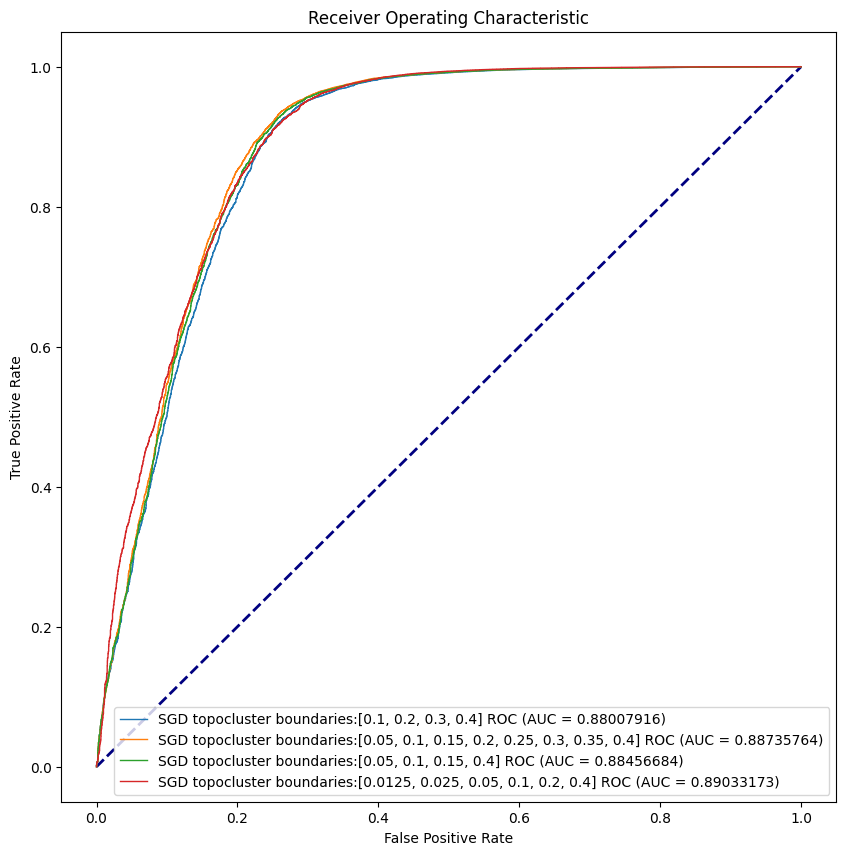

In [7]:
distance_boundaries_array = [[0.1,0.2,0.3,0.4],
                             [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],
                             [0.05,0.1,0.15,0.4],
                             [0.0125,0.025,0.05,0.1,0.2,0.4]]

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

for distance_boundaries in distance_boundaries_array:
    extension = ''.join(str(decimal).replace('.','').replace('.','') for decimal in distance_boundaries)
    X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename="l1calo_topocluster_test_Zee.root", reject_data_filename="l1calo_hist_ZB_EN.root", data_subdir=f"topocluster_test_Z_EN_test_{extension}", format_mode="topocluster_ET_boundaries",distance_boundaries=distance_boundaries)
    hinge_sgd_clf.fit(X_train, y_train)
    y_pred_hinge = hinge_sgd_clf.predict(X_test)
    print(distance_boundaries)
    evaluate_sklearn_model(y_test, y_pred_hinge, show_CR=False, show_MSE=False, model_name="hinge")
    fpr, tpr, roc_auc = compute_roc(hinge_sgd_clf,X_test,y_test)
    plt.plot(fpr, tpr, lw=1, label="SGD topocluster boundaries:"+f"{distance_boundaries} ROC (AUC = {roc_auc:.8f})")
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("multi_roc_topo_boundary_test_SGD", dpi=400, bbox_inches='tight')
plt.show()
        


[0.1, 0.2, 0.3, 0.4]
found preprepared data in ..\data\topocluster_test_Z_EN_test_01020304
training & predicting hinge SGD
Evaluation of hinge
Accuracy: 0.96078481
Recall: 0.98200210
Precision: 0.97661601
F1 Score: 0.97930165
Confusion Matrix:
 [[ 2604  1748]
 [ 1338 73004]]
training & predicting rbf SVM
Evaluation of svm
Accuracy: 0.96684627
Recall: 0.99603185
Precision: 0.96969657
F1 Score: 0.98268780
Confusion Matrix:
 [[ 2038  2314]
 [  295 74047]]
training & predicting weighted rbf SVM
Evaluation of svm w
Accuracy: 0.92493710
Recall: 0.93399424
Precision: 0.98580251
F1 Score: 0.95919932
Confusion Matrix:
 [[ 3352  1000]
 [ 4907 69435]]
[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
found preprepared data in ..\data\topocluster_test_Z_EN_test_00501015020250303504
training & predicting hinge SGD
Evaluation of hinge
Accuracy: 0.95636262
Recall: 0.97455005
Precision: 0.97915991
F1 Score: 0.97684954
Confusion Matrix:
 [[ 2810  1542]
 [ 1892 72450]]
training & predicting rbf SVM
Evaluatio

ValueError: X has 4 features, but SGDClassifier is expecting 6 features as input.

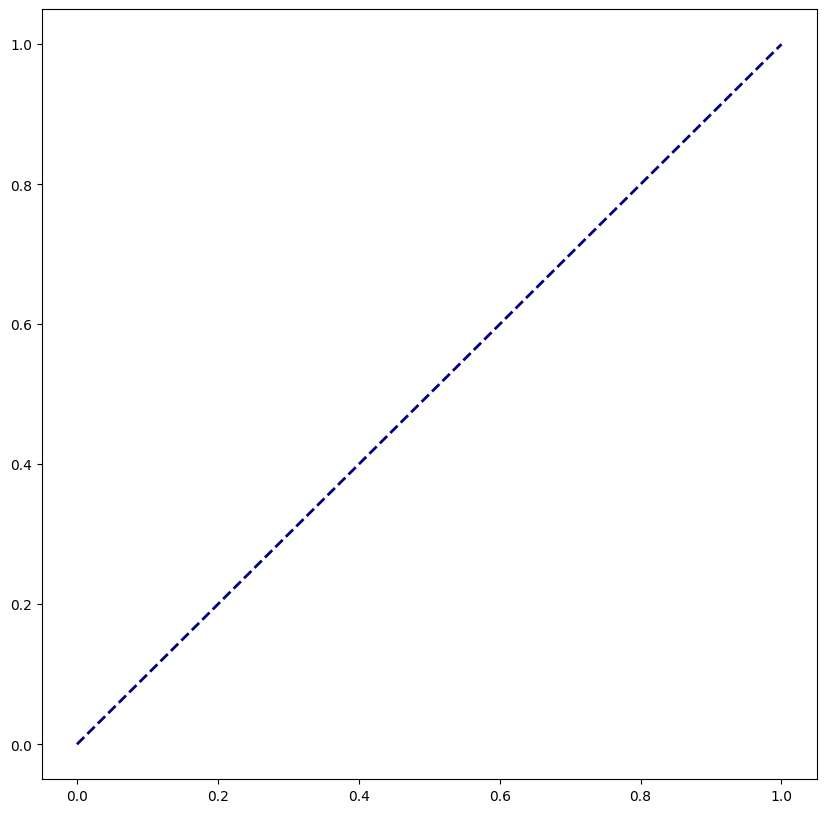

In [3]:
classifiers = {}
X_tests = []
y_tests = []

distance_boundaries_array = [[0.1,0.2,0.3,0.4],
                             [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],
                             [0.05,0.1,0.15,0.4],
                             [0.0125,0.025,0.05,0.1,0.2,0.4]]
for distance_boundaries in distance_boundaries_array:
    extension = ''.join(str(decimal).replace('.','').replace('.','') for decimal in distance_boundaries)
    print(distance_boundaries)

    X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename="l1calo_topocluster_test_Zee.root", reject_data_filename="l1calo_hist_ZB_EN.root", data_subdir=f"topocluster_test_Z_EN_test_{extension}", format_mode="topocluster_ET_boundaries",distance_boundaries=distance_boundaries)
    X_tests.append(X_test)
    y_tests.append(y_test)
    X_tests.append(X_test)
    y_tests.append(y_test)
    X_tests.append(X_test)
    y_tests.append(y_test)

    print("training & predicting hinge SGD")
    hinge_sgd_clf.fit(X_train, y_train)
    y_pred_hinge = hinge_sgd_clf.predict(X_test)
    classifiers["hinge SGD topo boundaries:"+f"{distance_boundaries}"] = hinge_sgd_clf
    evaluate_sklearn_model(y_test, y_pred_hinge, show_CR=False, show_MSE=False, model_name="hinge")
    
    print("training & predicting rbf SVM")
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    classifiers["rbf SVM topo boundaries:"+f"{distance_boundaries}"] = svm_clf
    evaluate_sklearn_model(y_test, y_pred , show_CR=False, show_MSE=False, model_name="svm")

    print("training & predicting weighted rbf SVM")
    sample_weights = compute_sample_weight("balanced", y_train)
    svm_clfw.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred_w = svm_clfw.predict(X_test)
    classifiers["weighted rbf SVM topo boundaries:"+f"{distance_boundaries}"] = svm_clfw
    evaluate_sklearn_model(y_test, y_pred_w, show_CR=False, show_MSE=False, model_name="svm w")

multi_roc_multi_data_single_plot(classifiers,X_tests,y_tests,"multi_roc_SGD_SVM_weighted_topocluster_boundary_comparison")